In [1]:
import os
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import *
from tensorflow.keras.utils import plot_model



## Load Dataset

In [2]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()

print("X Train: ", x_train.shape)
print("Y Train: ", y_train.shape)
print("X Test: ", x_test.shape)
print("Y Test: ", y_test.shape)

X Train:  (50000, 32, 32, 3)
Y Train:  (50000, 1)
X Test:  (10000, 32, 32, 3)
Y Test:  (10000, 1)


## Display Dataset Samples

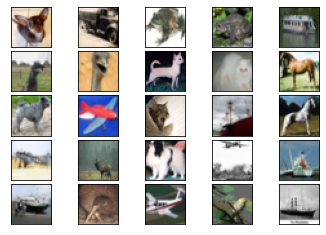

In [3]:
# display some random training images in a 25x25 grid
num_plot = 5
f, ax = plt.subplots(num_plot, num_plot)
for m in range(num_plot):
    for n in range(num_plot):
        idx = np.random.randint(0, x_train.shape[0])
        ax[m, n].imshow(x_train[idx])
        ax[m, n].get_xaxis().set_visible(False)
        ax[m, n].get_yaxis().set_visible(False)
f.subplots_adjust(hspace=0.1)
f.subplots_adjust(wspace=0)
plt.show()

In [4]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
# Prep data save paths
save_dir = os.path.abspath('Models/')


In [6]:
from modules import CNNModel

# Model 1

In [7]:
m_id = 1
model = CNNModel(id=m_id)()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                2

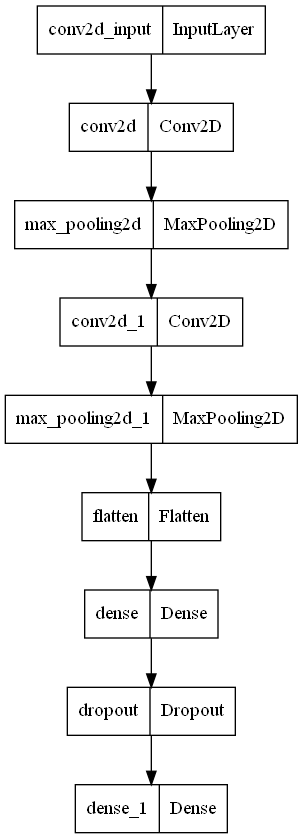

In [8]:
plot_model(model=model, to_file=os.path.join(save_dir, f'{m_id}/model.png'))

In [9]:
history = model.fit(x_train, y_train, batch_size=128, validation_data=(x_test, y_test), epochs=15, verbose=1)

Epoch 1/15
391/391 [==============================] - 16s 7ms/step - loss: 2.7781 - accuracy: 0.1303 - val_loss: 2.0985 - val_accuracy: 0.1935
Epoch 2/15
391/391 [==============================] - 2s 6ms/step - loss: 2.1224 - accuracy: 0.1681 - val_loss: 1.9901 - val_accuracy: 0.2307
Epoch 3/15
391/391 [==============================] - 2s 6ms/step - loss: 1.8838 - accuracy: 0.3002 - val_loss: 1.5821 - val_accuracy: 0.4281
Epoch 4/15
391/391 [==============================] - 2s 6ms/step - loss: 1.6226 - accuracy: 0.3940 - val_loss: 1.4239 - val_accuracy: 0.5020
Epoch 5/15
391/391 [==============================] - 2s 6ms/step - loss: 1.4834 - accuracy: 0.4548 - val_loss: 1.3117 - val_accuracy: 0.5365
Epoch 6/15
391/391 [==============================] - 2s 6ms/step - loss: 1.3585 - accuracy: 0.5043 - val_loss: 1.2574 - val_accuracy: 0.5605
Epoch 7/15
391/391 [==============================] - 2s 6ms/step - loss: 1.2451 - accuracy: 0.5511 - val_loss: 1.1097 - val_accuracy: 0.6099
Epoch

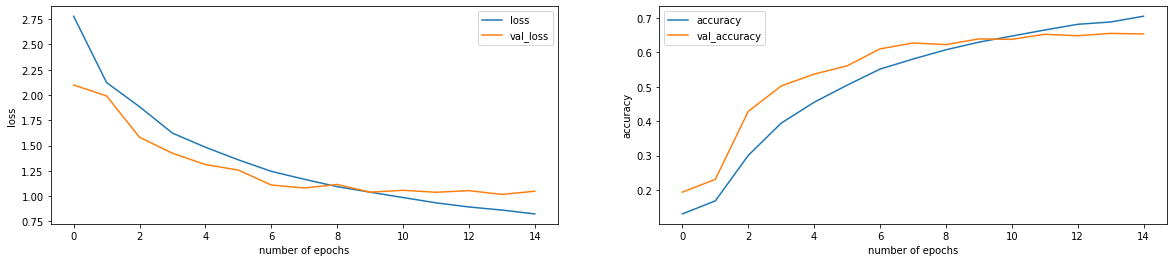

In [10]:
plt.figure(figsize=(20,4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.savefig(os.path.join(save_dir, f"{m_id}/training_history.png"))
plt.show()

In [11]:
pd.DataFrame(history.history).to_hdf(os.path.join(save_dir, f"{m_id}/history.h5"), 'history')
model.save(os.path.join(save_dir, f'{m_id}/model.h5'))
model.save_weights(os.path.join(save_dir, f'{m_id}/final_weights.hdf5'), overwrite=True)

In [12]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0484 - accuracy: 0.6532


[1.0484179258346558, 0.6531999707221985]

## Model 2

In [13]:
m_id = 2
model = CNNModel(id=m_id)()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

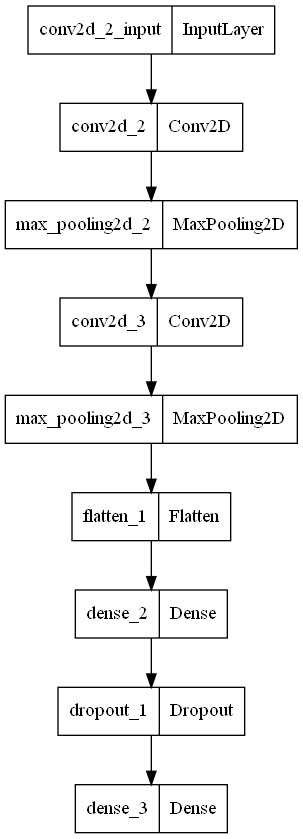

In [14]:
plot_model(model=model, to_file=os.path.join(save_dir, f'{m_id}/model.png'))

In [15]:
history = model.fit(x_train, y_train, batch_size=128, validation_data=(x_test, y_test), epochs=15, verbose=1)

Epoch 1/15
391/391 [==============================] - 3s 6ms/step - loss: 3.2939 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/15
391/391 [==============================] - 2s 6ms/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 3/15
391/391 [==============================] - 2s 6ms/step - loss: 2.3027 - accuracy: 0.0951 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/15
391/391 [==============================] - 2s 6ms/step - loss: 2.3027 - accuracy: 0.0969 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/15
391/391 [==============================] - 2s 6ms/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/15
391/391 [==============================] - 2s 6ms/step - loss: 2.3027 - accuracy: 0.0970 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/15
391/391 [==============================] - 2s 6ms/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 

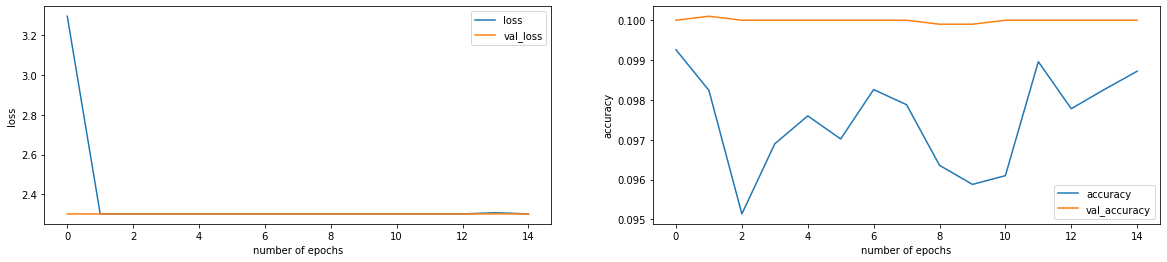

In [16]:
plt.figure(figsize=(20,4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.savefig(os.path.join(save_dir, f"{m_id}/training_history.png"))
plt.show()

In [17]:
pd.DataFrame(history.history).to_hdf(os.path.join(save_dir, f"{m_id}/history.h5"), 'history')
model.save(os.path.join(save_dir, f'{m_id}/model.h5'))
model.save_weights(os.path.join(save_dir, f'{m_id}/final_weights.hdf5'), overwrite=True)

In [18]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1000


[2.3025906085968018, 0.10000000149011612]

## Model 3

In [19]:
m_id = 3
model = CNNModel(id=m_id)()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 3, 3, 128)       

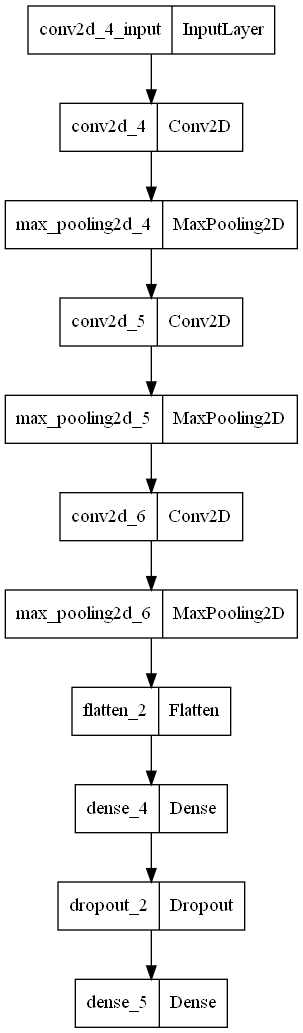

In [20]:
plot_model(model=model, to_file=os.path.join(save_dir, f'{m_id}/model.png'))

In [21]:
history = model.fit(x_train, y_train, batch_size=128, validation_data=(x_test, y_test), epochs=15, verbose=1)

Epoch 1/15
391/391 [==============================] - 3s 8ms/step - loss: 2.8748 - accuracy: 0.1999 - val_loss: 1.8066 - val_accuracy: 0.3480
Epoch 2/15
391/391 [==============================] - 3s 7ms/step - loss: 1.7735 - accuracy: 0.3472 - val_loss: 1.5231 - val_accuracy: 0.4570
Epoch 3/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5578 - accuracy: 0.4340 - val_loss: 1.3571 - val_accuracy: 0.5181
Epoch 4/15
391/391 [==============================] - 3s 7ms/step - loss: 1.4043 - accuracy: 0.4972 - val_loss: 1.2338 - val_accuracy: 0.5705
Epoch 5/15
391/391 [==============================] - 3s 7ms/step - loss: 1.2907 - accuracy: 0.5408 - val_loss: 1.1493 - val_accuracy: 0.5954
Epoch 6/15
391/391 [==============================] - 3s 7ms/step - loss: 1.1942 - accuracy: 0.5811 - val_loss: 1.1367 - val_accuracy: 0.6140
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 1.1142 - accuracy: 0.6088 - val_loss: 1.0500 - val_accuracy: 0.6374
Epoch 

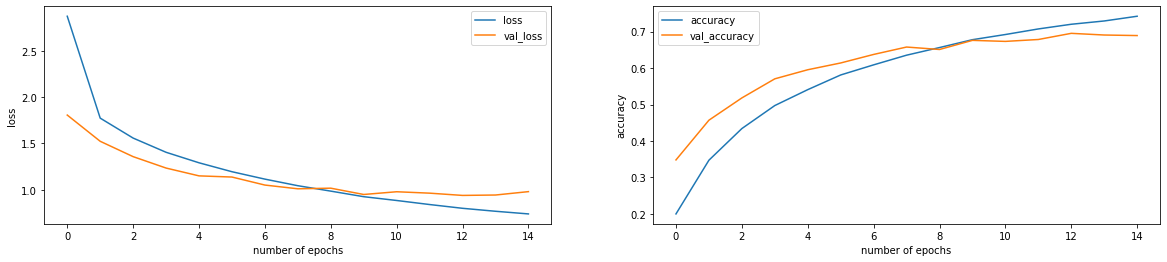

In [22]:
plt.figure(figsize=(20,4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.savefig(os.path.join(save_dir, f"{m_id}/training_history.png"))
plt.show()

In [23]:
pd.DataFrame(history.history).to_hdf(os.path.join(save_dir, f"{m_id}/history.h5"), 'history')
model.save(os.path.join(save_dir, f'{m_id}/model.h5'))
model.save_weights(os.path.join(save_dir, f'{m_id}/final_weights.hdf5'), overwrite=True)

In [24]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9789 - accuracy: 0.6892


[0.9789333939552307, 0.6891999840736389]

## Model 4

In [25]:
m_id = 4
model = CNNModel(id=m_id)()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 3, 3, 128)       

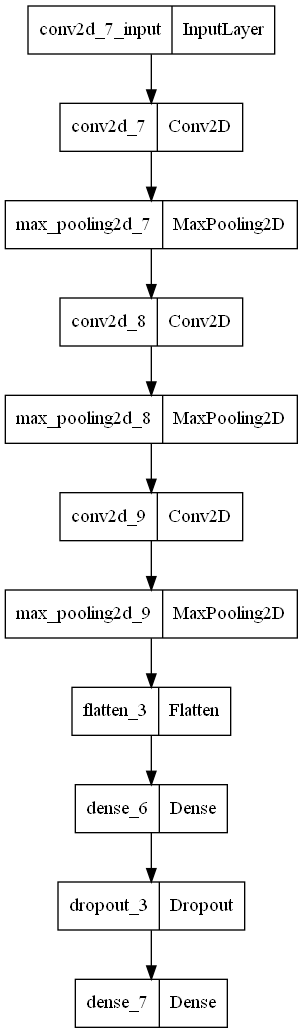

In [26]:
plot_model(model=model, to_file=os.path.join(save_dir, f'{m_id}/model.png'))

In [27]:
history = model.fit(x_train, y_train, batch_size=128, validation_data=(x_test, y_test), epochs=15, verbose=1)

Epoch 1/15
391/391 [==============================] - 3s 8ms/step - loss: 2.9372 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/15
391/391 [==============================] - 3s 7ms/step - loss: 2.3027 - accuracy: 0.0959 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/15
391/391 [==============================] - 3s 7ms/step - loss: 2.3027 - accuracy: 0.0951 - val_loss: 2.3026 - val_accuracy: 0.1000: 0s - loss: 2.3027 - accuracy: 0.
Epoch 4/15
391/391 [==============================] - 3s 7ms/step - loss: 2.3027 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/15
391/391 [==============================] - 3s 7ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/15
391/391 [==============================] - 3s 7ms/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.

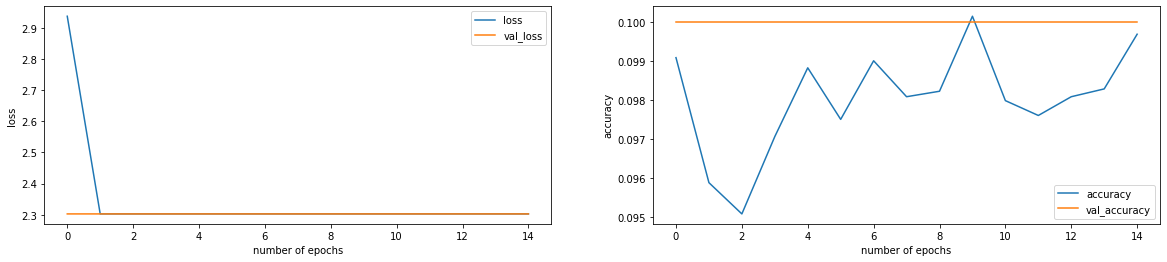

In [28]:
plt.figure(figsize=(20,4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.savefig(os.path.join(save_dir, f"{m_id}/training_history.png"))
plt.show()

In [29]:
pd.DataFrame(history.history).to_hdf(os.path.join(save_dir, f"{m_id}/history.h5"), 'history')
model.save(os.path.join(save_dir, f'{m_id}/model.h5'))
model.save_weights(os.path.join(save_dir, f'{m_id}/final_weights.hdf5'), overwrite=True)

In [30]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1000


[2.302597761154175, 0.10000000149011612]

## Model 5

In [31]:
m_id = 5
model = CNNModel(id=m_id)()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 3, 3, 128)       

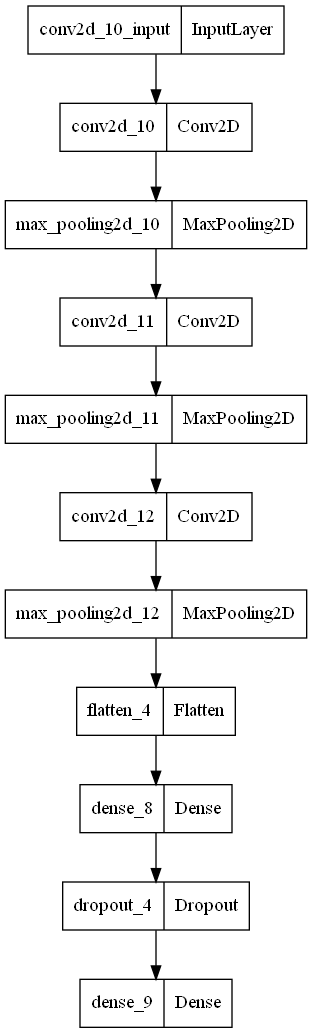

In [32]:
plot_model(model=model, to_file=os.path.join(save_dir, f'{m_id}/model.png'))

In [33]:
history = model.fit(x_train, y_train, batch_size=128, validation_data=(x_test, y_test), epochs=15, verbose=1)

Epoch 1/15
391/391 [==============================] - 3s 7ms/step - loss: 2.8628 - accuracy: 0.1045 - val_loss: 2.2943 - val_accuracy: 0.1079
Epoch 2/15
391/391 [==============================] - 3s 7ms/step - loss: 2.1778 - accuracy: 0.1738 - val_loss: 1.9254 - val_accuracy: 0.2810
Epoch 3/15
391/391 [==============================] - 3s 7ms/step - loss: 1.8690 - accuracy: 0.2915 - val_loss: 1.6441 - val_accuracy: 0.3967
Epoch 4/15
391/391 [==============================] - 3s 7ms/step - loss: 1.7181 - accuracy: 0.3559 - val_loss: 1.6040 - val_accuracy: 0.4255
Epoch 5/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5466 - accuracy: 0.4354 - val_loss: 1.3290 - val_accuracy: 0.5335
Epoch 6/15
391/391 [==============================] - 3s 7ms/step - loss: 1.4042 - accuracy: 0.4894 - val_loss: 1.2319 - val_accuracy: 0.5569oss: 1.4118 - accu
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 1.2784 - accuracy: 0.5344 - val_loss: 1.1225 - val_accur

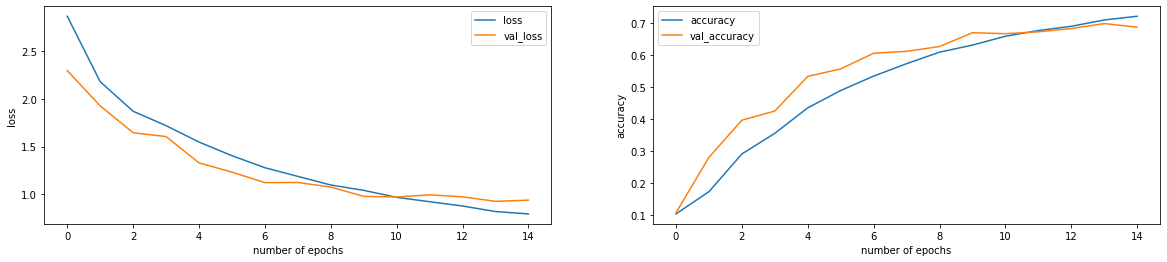

In [34]:
plt.figure(figsize=(20,4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.savefig(os.path.join(save_dir, f"{m_id}/training_history.png"))
plt.show()

In [35]:
pd.DataFrame(history.history).to_hdf(os.path.join(save_dir, f"{m_id}/history.h5"), 'history')
model.save(os.path.join(save_dir, f'{m_id}/model.h5'))
model.save_weights(os.path.join(save_dir, f'{m_id}/final_weights.hdf5'), overwrite=True)

In [36]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9390 - accuracy: 0.6869


[0.9390249252319336, 0.6869000196456909]